## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 加载数据

In [2]:
df_train = pd.read_csv('./data/train.tsv', sep='\t')
df_test = pd.read_csv('./data/test.tsv', sep='\t')

In [3]:
X_train = df_train.Phrase
y_train = df_train.Sentiment
tokenize = keras.preprocessing.text.Tokenizer()
tokenize.fit_on_texts(X_train.values)

In [4]:
X_test = df_test.Phrase
X_train = tokenize.texts_to_sequences(X_train)
X_test = tokenize.texts_to_sequences(X_test)

In [5]:
max_lenght = max([len(s.split()) for s in df_train['Phrase']])
X_train = keras.preprocessing.sequence.pad_sequences(X_train, max_lenght)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, max_lenght)

## 参数

In [6]:
EMBEDDING_DIM = 100
unknown = len(tokenize.word_index)+1

## 模型

In [7]:
model = keras.models.Sequential([
    keras.layers.Embedding(unknown, EMBEDDING_DIM, input_length=max_lenght),
    keras.layers.LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 52, 100)           1528900   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 1,646,793
Trainable params: 1,646,793
Non-trainable params: 0
_________________________________________________________________


## 损失和优化

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 训练

In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=7)

Train on 156060 samples
Epoch 1/7
156060/156060 [==============================] - 82s 523us/sample - loss: 0.9611 - accuracy: 0.6128
Epoch 2/7
156060/156060 [==============================] - 83s 531us/sample - loss: 0.7709 - accuracy: 0.6810
Epoch 3/7
156060/156060 [==============================] - 81s 517us/sample - loss: 0.7066 - accuracy: 0.7034- loss: 0.7064 
Epoch 4/7
156060/156060 [==============================] - 79s 508us/sample - loss: 0.6612 - accuracy: 0.7215
Epoch 5/7
156060/156060 [==============================] - 79s 505us/sample - loss: 0.6240 - accuracy: 0.7364
Epoch 6/7
156060/156060 [==============================] - 79s 509us/sample - loss: 0.5948 - accuracy: 0.7468
Epoch 7/7
156060/156060 [==============================] - 80s 514us/sample - loss: 0.5680 - accuracy: 0.7561


## 绘梯度图

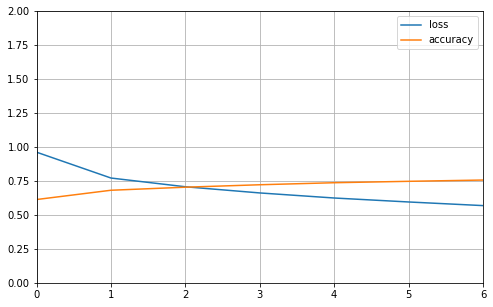

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
    
plot_learning_curves(history)

In [11]:
model.save('./save/save_model/model.h5')

In [12]:
model.save_weights('./save/save_weights/model_weights.h5')